# This code predicts weather a person is likely to have diabetes or not based on his features

### Importing libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv("data/pima-data.csv")

In [44]:
df.head()

,bmi,age,diabetes
0,33.6,50,True
1,26.6,31,False
2,23.3,32,True
3,28.1,21,False
4,43.1,33,True


In [42]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Deleting unnecessary columns 

In [43]:
del df["skin"]
del df["thickness"]
del df["num_preg"]
del df['glucose_conc']
del df['insulin']
del df['diastolic_bp']
del df['diab_pred']

In [45]:
df.isnull().values.any()  #finding if there are any null values

False

## Finding if there are any correlations

In [46]:
def plot_corr(df,size=11):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    

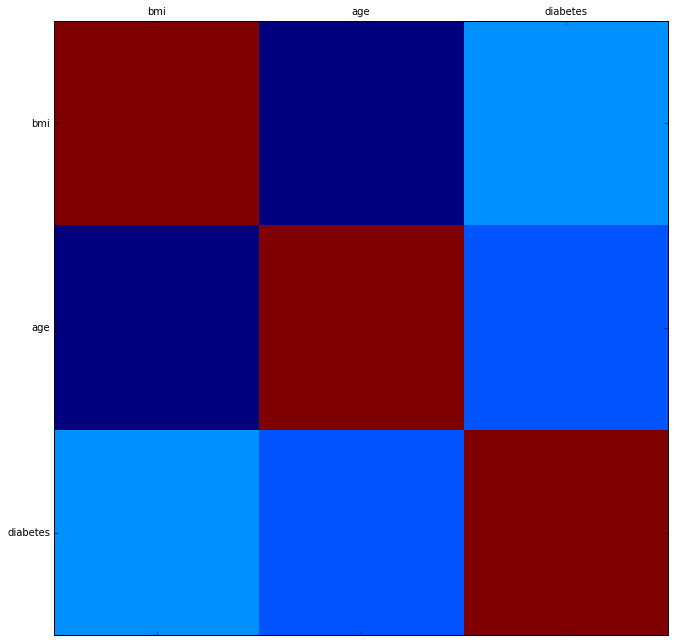

In [47]:
%matplotlib inline
plot_corr(df)

### CHECK TRUE OR FALSE RATIO


In [48]:
diabetes_map={True:1,False:0}
df["diabetes"]=df["diabetes"].map(diabetes_map)

In [49]:
num_true=len(df.loc[df["diabetes"] == True])
num_false=len(df.loc[df["diabetes"] == False])
print("Number of True cases: ", (num_true,(num_true/(num_true+num_false))*100))
print("Number of False cases: ", (num_false,(num_false/(num_true+num_false))*100))


('Number of True cases: ', (268, 0))
('Number of False cases: ', (500, 0))


### Splitting the data 

In [50]:
from sklearn.cross_validation import train_test_split


In [51]:
features=df.columns.delete(-1)
predicted=df.columns-features
X=df[features].values
Y=df[predicted].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


### Checking Zeroes

In [52]:
print "rows in dataframe ",len(df)
print "rows missing glucose conc ", len(df.loc[df["glucose_conc"] == 0])
print "rows misssing bp", len(df.loc[df["diastolic_bp"]==0])
print "rows missing insulin ",len(df.loc[df["insulin"]==0])
print "rows missing bmi ",len(df.loc[df["bmi"] == 0])
print "rows missing diabetes predispositon function ",len(df.loc[df["diab_pred"] == 0])
print "rows missing age ",len(df.loc[df["age"] == 0])

rows in dataframe  768
rows missing glucose conc 

KeyError: 'glucose_conc'

## Imputing Missing values using mean of the column

In [53]:
from sklearn.preprocessing import Imputer

#Imputing missing values with mean
fill_0=Imputer(missing_values=0,strategy="mean",axis=0)
X_train=fill_0.fit_transform(X_train)
X_test=fill_0.fit_transform(X_test)

## Training algorithm logistic regression

In [54]:
from sklearn import linear_model
logit = linear_model.LogisticRegression(C=1e5)
logit.fit(X_train,Y_train.ravel())

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [55]:
print "The coefficients are ",logit.coef_

The coefficients are  [[ 0.12166833  0.05578986]]


In [56]:
print "The Intercept is ",logit.intercept_

The Intercept is  [-6.53487378]


## Predicting the values of test data from the model

In [57]:
def model(x):
    return 1/(1+(np.exp(-x)))

In [58]:
a=(X_test*logit.coef_)
y_pred=[]

In [59]:
for i in a:
    y_pred.append(model(np.sum(i)+logit.intercept_))

In [60]:
y_pred=np.array(y_pred)

In [61]:
y_pred

array([[ 0.50020334],
       [ 0.26508052],
       [ 0.16577079],
       [ 0.16178889],
       [ 0.47315139],
       [ 0.75407486],
       [ 0.05596362],
       [ 0.50806669],
       [ 0.34019389],
       [ 0.76704312],
       [ 0.27739898],
       [ 0.72583141],
       [ 0.23913705],
       [ 0.48803879],
       [ 0.13562461],
       [ 0.28471298],
       [ 0.39014665],
       [ 0.1792358 ],
       [ 0.25520188],
       [ 0.49678849],
       [ 0.41267628],
       [ 0.2643304 ],
       [ 0.60557054],
       [ 0.21017048],
       [ 0.50220593],
       [ 0.51792635],
       [ 0.12059165],
       [ 0.06912392],
       [ 0.57057612],
       [ 0.32824312],
       [ 0.791275  ],
       [ 0.86844479],
       [ 0.42466303],
       [ 0.28266289],
       [ 0.84197755],
       [ 0.36987537],
       [ 0.75877743],
       [ 0.38683438],
       [ 0.53700921],
       [ 0.54282841],
       [ 0.1693307 ],
       [ 0.54305356],
       [ 0.76720174],
       [ 0.35005277],
       [ 0.07232189],
       [ 0

## Creating a classification from the predicted value of the model

In [62]:
Y_pred=[]

In [63]:
for i in y_pred:
    if i < 0.5:
        Y_pred.append(0)
    else:
        Y_pred.append(1)
        

In [64]:
Y_pred=np.array(Y_pred)
Y_pred=Y_pred.ravel()
Y_pred=Y_pred[:,np.newaxis]
Y_pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [65]:
c=Y_test.shape[0]

## Checking the accuracy of the model

In [66]:
fault=0
for i in range(c):
    if Y_test[i] == Y_pred[i]:
        pass
    else:
        fault = fault + 1

In [67]:
print "The accuracy is", (1-(fault/float(c)))*100

The accuracy is 63.6363636364


## Checking weather the Algorithm is intact

In [347]:
new_ypred=[]
for i in X_test:
    new_ypred.append(logit.predict(i.reshape(1,-1)))

In [348]:
new_ypred

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),

In [349]:
new_ypred==Y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

## Prediction of weather a person is likely to have Diabetes based on his features

In [313]:
df[features].head()


,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age
0,148,72,0,33.6,0.627,50
1,85,66,0,26.6,0.351,31
2,183,64,0,23.3,0.672,32
3,89,66,94,28.1,0.167,21
4,137,40,168,43.1,2.288,33


In [335]:
a=[]
columns=["Glucose_conc","BP","Insulin","BMI","diab_ped","Age"]
no_of_persons=int(raw_input("No of persons"))
for j in range(no_of_persons):
    c=[]
    a.append(c)
    for i in columns:
        d=float(raw_input("Values of "+str(i)))
        c.append(d)

No of persons2
Values of Glucose_conc234
Values of BP234
Values of Insulin123
Values of BMI34.3
Values of diab_ped0.23
Values of Age23
Values of Glucose_conc123
Values of BP234
Values of Insulin343
Values of BMI343
Values of diab_ped23
Values of Age21


In [337]:
df1=pd.DataFrame(a,columns=columns)

In [341]:
X_new=df1.values

In [346]:
for j in X_new:
    a=logit.predict(j.reshape(1,-1))
    if a==1:
        print "Person has diabetes"
    elif a==0:
        print "Person does not have diabetes"

Person has diabetes
Person has diabetes
